<a href="https://colab.research.google.com/github/AndreyAntoshkin/AndreyAntoshkin/blob/main/ANOVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg

ModuleNotFoundError: No module named 'pingouin'

In [10]:
df = pd.read_csv("5_task_1.csv")

In [19]:
df.shape

(30000, 3)

In [13]:
df.head(5)

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30
3,22633,A,37
4,28071,A,38


In [15]:
# Проверьте, являются ли дисперсии внутри групп примерно одинаковыми (гомогенными) с помощью теста Левена.

# Может помочь: конспект 4 урока, шаг "Проверка равенства дисперсий"

In [29]:
group_A = df.query('group == "A"').events

In [18]:
group_A.shape

(10000, 3)

In [30]:
group_B = df.query('group == "B"').events

In [22]:
group_B.shape

(10000, 3)

In [31]:
group_C = df.query('group == "C"').events

In [25]:
group_C.shape

(10000, 3)

In [32]:
levene_stat, p_value = st.levene(group_A, group_B, group_C)

In [33]:
levene_stat

np.float64(2.2622596339318037)

In [34]:
p_value

np.float64(0.1041327199523974)

Также убедитесь, что данные распределены нормально - тем же способом, что и в прошлом уроке.

Дополнительно: сравните результат с qq-графиками. Какой вывод можно сделать по совокупности этих методов?

In [38]:
normality_results = [st.shapiro(series.dropna()) for series in [group_A, group_B, group_C]]

In [39]:
normality_results

[ShapiroResult(statistic=np.float64(0.9989209769788764), pvalue=np.float64(3.3827999572428407e-06)),
 ShapiroResult(statistic=np.float64(0.9990152741626567), pvalue=np.float64(1.0400249208438117e-05)),
 ShapiroResult(statistic=np.float64(0.9989340547219037), pvalue=np.float64(3.942400416472453e-06))]

In [40]:
# Пример вывода результатов
for i, (stat, pval) in enumerate(normality_results, 1):
    print(f"Группа {i}: статистика = {stat:.4f}, p-value = {pval:.4f}")
    if pval > 0.05:
        print(f"  ✓ Распределение нормальное (p > 0.05)")
    else:
        print(f"  ✗ Распределение НЕ нормальное (p ≤ 0.05)")

Группа 1: статистика = 0.9989, p-value = 0.0000
  ✗ Распределение НЕ нормальное (p ≤ 0.05)
Группа 2: статистика = 0.9990, p-value = 0.0000
  ✗ Распределение НЕ нормальное (p ≤ 0.05)
Группа 3: статистика = 0.9989, p-value = 0.0000
  ✗ Распределение НЕ нормальное (p ≤ 0.05)


In [43]:

# Простая проверка для одной группы
statistic, p_value = st.normaltest(group_A.dropna())

# Для всех трех групп сразу
results = [st.normaltest(series.dropna()) for series in [group_A, group_B, group_C]]

In [44]:
results

[NormaltestResult(statistic=np.float64(2.1034599402238734), pvalue=np.float64(0.3493328906085719)),
 NormaltestResult(statistic=np.float64(0.8410715800223014), pvalue=np.float64(0.6566948749848232)),
 NormaltestResult(statistic=np.float64(3.243725809054571), pvalue=np.float64(0.19753037588314626))]

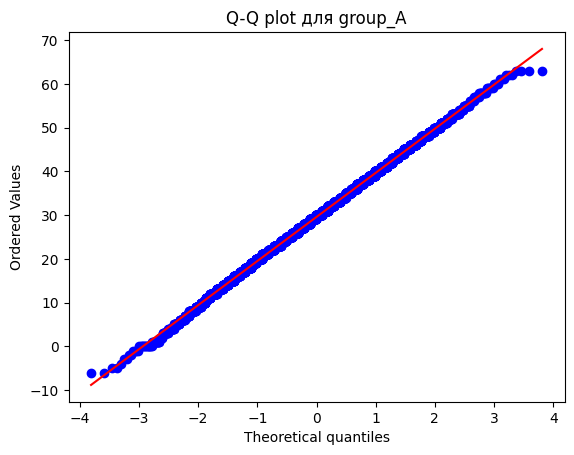

In [45]:
stats.probplot(group_A.dropna(), dist="norm", plot=plt)
plt.title('Q-Q plot для group_A')
plt.show()

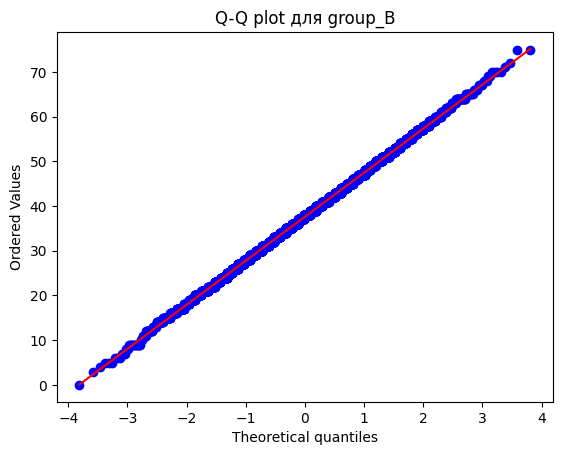

In [46]:
stats.probplot(group_B.dropna(), dist="norm", plot=plt)
plt.title('Q-Q plot для group_B')
plt.show()

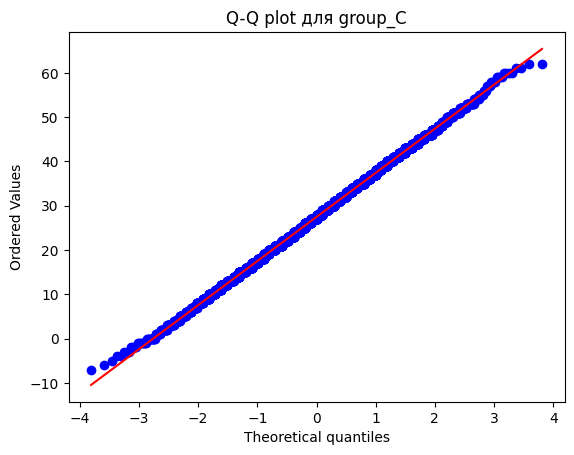

In [47]:
stats.probplot(group_C.dropna(), dist="norm", plot=plt)
plt.title('Q-Q plot для group_C')
plt.show()